In [8]:
%load_ext autoreload

%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Animal_pose import Animal_pose
from spikeA.Session import Session
from spikeA.Dat_file_reader import Dat_file_reader
from spikeA.Intervals import Intervals
from spikeA.Spike_train import Spike_train
from spikeA.Spike_waveform import Spike_waveform
from tqdm import tqdm
import os.path
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
import pickle
import spikeA.spatial_properties

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
with open(f"/home/beate/Downloads/ses.pickle", 'rb') as loaded_ses_file:
    ses = pickle.load(loaded_ses_file)
with open(f"/home/beate/Downloads/spatial_auto.pickle", 'rb') as loaded_ses_file:
    auto = pickle.load(loaded_ses_file)

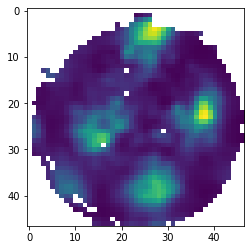

In [12]:
rate_map = ses.cg.neuron_list[1].spatial_properties.firing_rate_map
plt.imshow(rate_map)

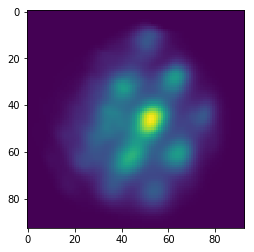

In [13]:
plt.imshow(auto)

To get the spatial autocorrelation manually

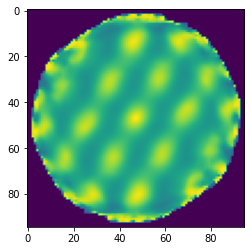

In [21]:
rate_map[np.isnan(rate_map)]=-1
auto_array = np.zeros((2*rate_map.shape[0]+1,2*rate_map.shape[1]+1))
spikeA.spatial_properties.map_autocorrelation_func(rate_map,auto_array)
plt.imshow(auto_array)

To get the spatial autocorrelation via spikeA function

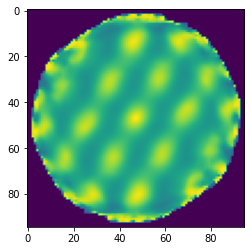

In [22]:
ses.cg.neuron_list[1].set_spatial_properties(ses.ap)
ses.cg.neuron_list[1].spatial_properties.spatial_autocorrelation_map_2d()
plt.imshow(ses.cg.neuron_list[1].spatial_properties.spatial_autocorrelation_map)